In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# table_file_append = "../data/comparison_output_rank6.csv"
# table_file = "../data/comparison_final_rank4.csv"
# table_tvart = '../data/comparison_output_rank4.csv'
# table_ssm = "../data/comparison_output_ssm.csv"
# suffix = "200"


# #table_file_append = "../data/comparison_output_rank6.csv"
# table_file_append = "../data/comparison_output_200_arhmm_rank4.csv"
# #table_file = "../data/comparison_final_rank4.csv"
# table_tvart = '../data/comparison_output_rank4.csv'
# table_ssm = "../data/comparison_output_ssm.csv"
# suffix = "200_arhmm"

#table_file_append = None
table_file_append = "../data/comparison_output_2000_arhmm.csv"
table_tvart = '../data/comparison_output_2000_rank6.csv'
# table_tvart = '../data/comparison_output_2000_rank6_M_200.csv'
table_ssm = "../data/comparison_output_2000_slds.csv"
suffix = "2000_arhmm"

In [3]:
comparison_table = pd.read_csv(table_tvart)

if suffix == '2000' or '2000_M_200' or '2000_arhmm':
    # TVART and indep were run with rank = 6
    comparison_table['model'].replace({1: 'indep(N)', 2: 'indep(6)', 3: 'TVART(6)',
                       4: 'SLDS(4)', 5: 'SLDS(6)'}, inplace=True)
    
ssm_table = pd.read_csv(table_ssm)
comparison_table = comparison_table.append(ssm_table)
comparison_table[comparison_table['N'] == 1000]

,N,window,model,err_inf,err_2,err_fro,model_MSE,true_MSE
30,1000,NaN,SLDS(4),0.017143,2.126068,2.305671,126.030589,NaN
31,1000,NaN,SLDS(4),0.017618,2.124107,2.305081,126.152665,NaN
32,1000,NaN,SLDS(4),0.017482,2.239677,2.417827,126.338871,NaN


In [4]:
if table_file_append is not None:
    append_table = pd.read_csv(table_file_append)
    print(append_table.tail())
    to_append = append_table[append_table.model != "indep(N)"]
    if suffix == '200':
        to_append.loc[:, "model"] = to_append.loc[:, "model"] + 5
    comparison_table = comparison_table.append(to_append)

       N  window  model   err_inf     err_2    err_fro  model_MSE  true_MSE
28   400     NaN  ARHMM  0.486371  8.904926  40.908911   0.204658       NaN
29   400     NaN  ARHMM  0.488592  9.127280  41.326771   0.205279       NaN
30  1000     NaN  ARHMM  0.640292  4.058776  38.835604   0.240774       NaN
31  1000     NaN  ARHMM  0.623991  4.325462  38.848319   0.234698       NaN
32  1000     NaN  ARHMM  0.624349  4.211866  38.927000   0.239377       NaN


In [5]:
comparison_table['model'].unique()

array(['indep(N)', 'indep(6)', 'TVART(6)', 'SLDS(4)', 'ARHMM'],
      dtype=object)

In [6]:
if suffix == '2000':
    comparison_table= comparison_table[comparison_table['N'] <= 400]

In [7]:
np.where(data['N'] > 400)[0]


NameError: name 'data' is not defined

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


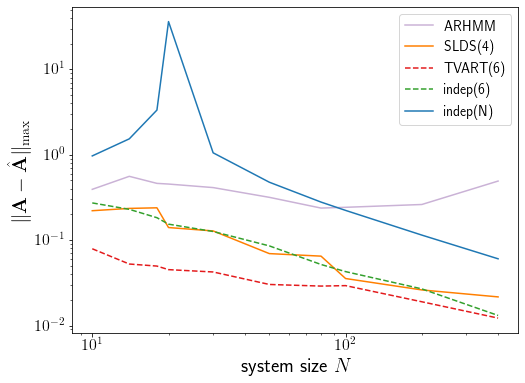

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


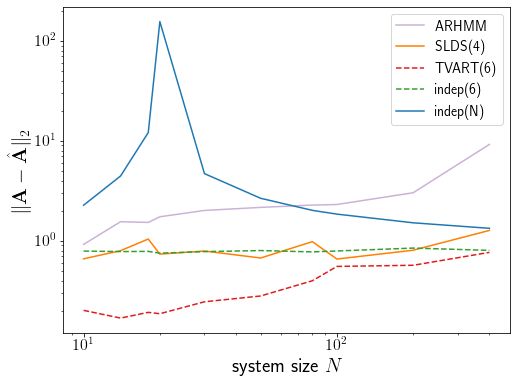

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


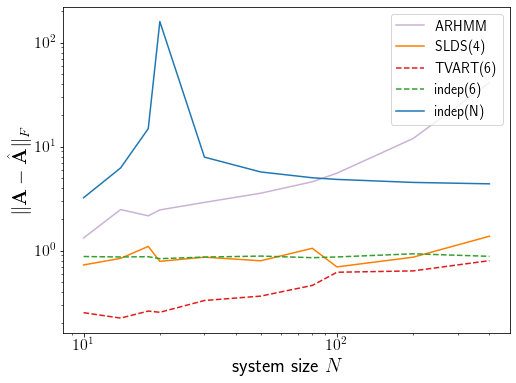

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


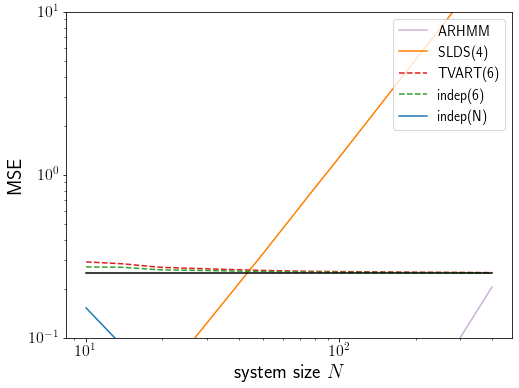

In [8]:
data = comparison_table.copy()
data['model'].replace({1: 'indep(N)', 2: 'indep(4)', 3: 'TVART(4)',
                       4: 'SLDS(4)', 5: 'SLDS(6)', 7: 'indep(6)', 8: 'TVART(6)'}, inplace=True)
data = data[data['N'] <= 400]

import matplotlib
import seaborn as sns

#sns.set()

rgb_values = sns.color_palette("Paired")

plt.rc('text', usetex=True)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams.update({'font.size': 16})

#plt.loglog(data['N'], data['err_2'])

for plot_type in ['err_inf', 'err_2', 'err_fro', 'model_MSE']:
    fig, ax = plt.subplots(figsize=(8,6))
    for key, grp in data.groupby(['model']):
        grp = grp.groupby(['N']).mean()
        skip_plot = False
        if key == 'indep(N)':
            style = '-'
            color = rgb_values[1]
        elif key == 'indep(4)':
            style = '-'
            color = rgb_values[3]
        elif key == 'TVART(4)':
            style = '-'
            color = rgb_values[5]
        elif key == 'SLDS(4)':
            style = '-'
            color = rgb_values[7]
        elif key == 'SLDS(6)':
            style = '--'
            color = rgb_values[7]
        elif key == 'indep(6)':
            style = '--'
            color = rgb_values[3]
        elif key == 'TVART(6)':
            style = '--'
            color = rgb_values[5]
        elif key == 'ARHMM' or 'ARHMM(4)':
            style = '-'
            color = rgb_values[8]
        else:
            skip_plot = True
        if not skip_plot:
            ax = grp.plot(ax=ax, kind='line', y=plot_type, label=key, logx=True, logy=True,
                         style=style, color=color)
    plt.legend(loc='upper right', fontsize=14)
    plt.xlabel('system size $N$', fontsize=20)
    if plot_type == 'err_inf':
        plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_\mathrm{max}$", fontsize=20)
        #plt.ylabel("$|| \mathbf{A} - \hat{\mathbf{A}} ||_\mathrm{max}$", fontsize=20)
        #plt.ylim([10**-3, 10**1.5])
    elif plot_type == 'err_2':
        plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_{2}$", fontsize=20)
        #plt.ylabel("$|| \mathbf{A} - \hat{\mathbf{A}} ||_{2}$", fontsize=20)
        #plt.ylim([10**-1, 10**2.5])
    elif plot_type == 'err_fro':
        plt.ylabel("$\| \mathbf{A} - \hat{\mathbf{A}} \|_F$", fontsize=20)
        #plt.ylabel("$|| \mathbf{A} - \hat{\mathbf{A}} ||_F$", fontsize=20)
        #plt.ylim([10**-1, 10**2.5])
    elif plot_type == 'model_MSE':
        plt.ylabel("MSE", fontsize=20)
        plt.plot([min(grp.index), max(grp.index)], [0.25, 0.25], 'k-', label='$\sigma^2$')
        #plt.legend(loc='upper right', fontsize=14)
        lim_low, lim_hi = ax.get_ylim()
        plt.ylim([10**-1, 10**1])
    plt.savefig(f"../figures/switching_compare_{plot_type}_{suffix}.eps")
    plt.show()
    #plt.close()